In [1]:
import datetime
import json
import urllib.request
import key

In [2]:
now = datetime.datetime.now()

posts_to_comments = {}
comments_to_cities = {}
comments_to_ages = {}
comments = []

i = 0
k = 0

with open ('Mash_wall.txt', 'w', encoding='utf-8') as f:
    f.write(str(now.strftime("%d-%m-%Y %H:%M") + '\n'))
    
try:
    req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-112510789&count=100&offset={}&v=5.73&access_token={}'.format(i, key.access))
    while req:
        print(i)
        with urllib.request.urlopen(req) as response:
            html = response.read().decode('utf-8')
        data1 = json.loads(html)
        for j in range(100):
            with open ('Mash_wall.txt', 'a', encoding='utf-8') as f:
                f.write(data1["response"]["items"][j]['text']+'\n')
            posts_to_comments[data1["response"]["items"][j]['text']] = comments
            try:
                req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-112510789&count=100&offset={}&post_id={}&sort=asc&v=5.73&access_token={}'.format(k, data1["response"]["items"][j]['id'], key.access))
                while req:
                    with urllib.request.urlopen(req) as response:
                        html = response.read().decode('utf-8')
                    data2 = json.loads(html) 
                    for n in range(100):
                        comments.append(data2["response"]["items"][n]['text'])
                        req = urllib.request.Request('https://api.vk.com/method/users.get?user_ids={}&fields=bdate,city&v=5.73&access_token={}'.format(data2["response"]["items"][n]['from_id'], key.access))
                        with urllib.request.urlopen(req) as response:
                            html = response.read().decode('utf-8')
                        data3 = json.loads(html)
                        try:
                            if "city" in data3["response"][0]:
                                comments_to_cities[data2["response"]["items"][n]['text']] = data3["response"][0]["city"]["title"]
                            else:
                                continue
                        except:
                            continue
                        try:
                            if "bdate" in data3["response"][0]:
                                b = data3["response"][0]["bdate"].split('.')
                                age = 2018 - int(b[2])
                                comments_to_ages[data2["response"]["items"][n]['text']] = age
                            else:
                                continue
                        except:
                            continue      
                    k += 100
                    req = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-112510789&count=100&offset={}&post_id={}&sort=asc&v=5.73&access_token={}'.format(k, data1["response"]["items"][j]['id'], key.access))
            except:
                posts_to_comments[data1["response"]["items"][j]['text']] = comments
                with open ('Mash_wall.txt', 'a', encoding='utf-8') as f:
                    for comment in comments:
                        if comment != '':
                            f.write(comment + '\n')
                        else:
                            continue
                comments = []
                k = 0
                with open ('Mash_wall.txt', 'a', encoding='utf-8') as f:
                    f.write('\n')
        i += 100
        req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-112510789&count=100&offset={}&v=5.73&access_token={}'.format(i, key.access))
#         if i == 1000:
#             print('done it.')
#             break
#         else:
#             continue
except:
    print('done')
    
now = datetime.datetime.now()
with open ('Mash_wall.txt', 'a', encoding='utf-8') as f:
    f.write(str(now.strftime("%d-%m-%Y %H:%M")))

0
100
200
300
400
500
600
700
800
900
done it.


In [4]:
print(len(posts_to_comments))

975


In [5]:
len_posts_to_avg_comments = {}

for k,v in posts_to_comments.items():
    post_len = len(k.split())
    len_of_all_comments = 0
    num_of_all_com = len(v)
    for com in v:
        len_com = com.split()
        len_of_all_comments += len(len_com)
    if post_len / 10 < 1:
        post_len = '00'+str(post_len)
    elif post_len / 10 < 10:
        post_len = '0'+str(post_len)
    if num_of_all_com == 0:
        continue
    else:    
        len_posts_to_avg_comments[str(post_len)] = round(len_of_all_comments/num_of_all_com)

print('done')

done


In [6]:
from collections import OrderedDict


d = OrderedDict(sorted(len_posts_to_avg_comments.items(), key=lambda t: t[0]))

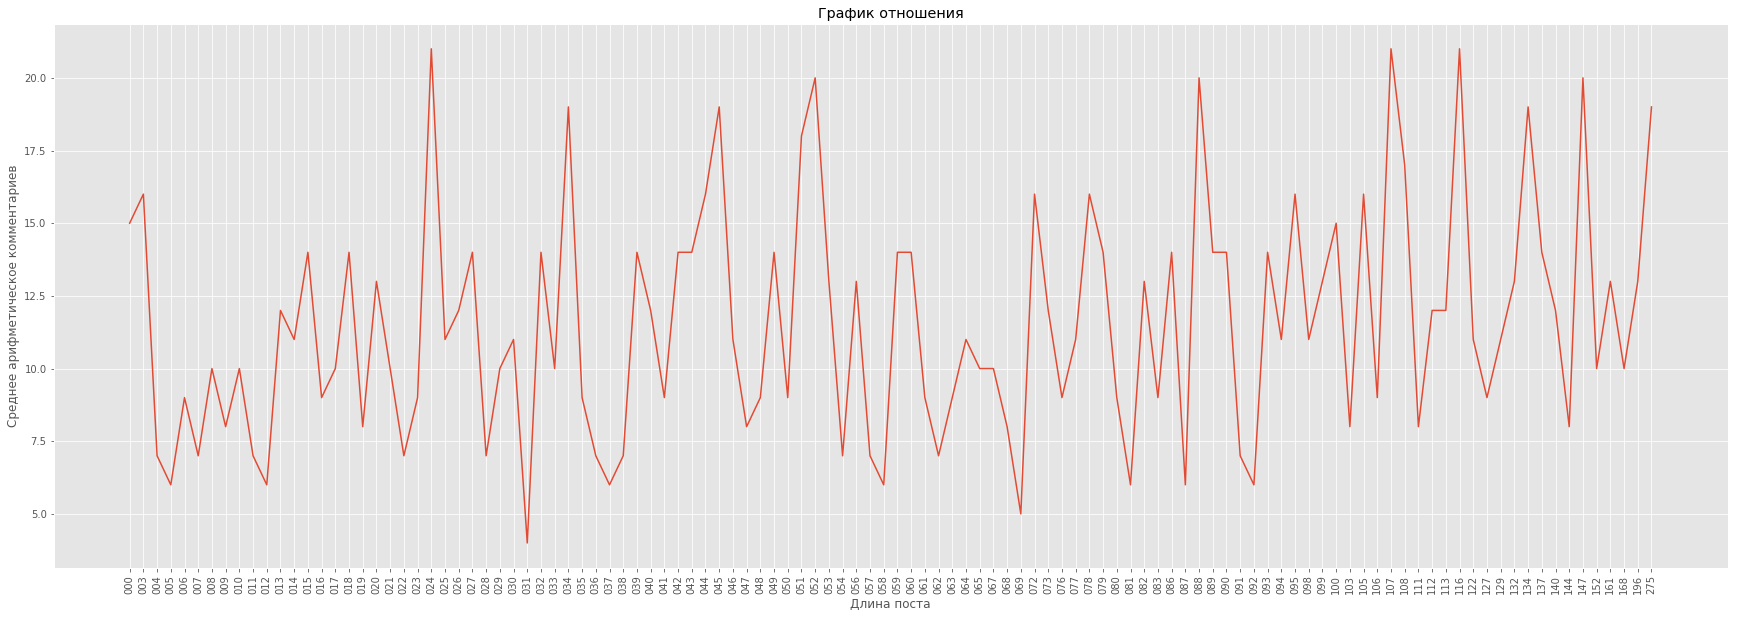

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


x = []
y = []
    
for k,v in d.items():
    x.append(k)
    y.append(v)

plt.figure(figsize=(30, 10))
plt.plot(x, y)
plt.title('График отношения')
plt.xlabel('Длина поста')
plt.ylabel('Среднее арифметическое комментариев')
plt.xticks(rotation=90)
plt.savefig('plot__len_posts_to_avg_comments.png', format='png', dpi=100)

In [9]:
cities_to_avg_comments = {}

for k,v in comments_to_cities.items():
    if v not in cities_to_avg_comments:
        l = 0
        num = 0
        for key, value in comments_to_cities.items():
            if v == value:
                l += len(key)
                num += 1
            else:
                continue
        cities_to_avg_comments[v] = round(l/num)
    else:
        continue
        
print('done')

done


In [12]:
d = OrderedDict(sorted(cities_to_avg_comments.items(), key=lambda t: t[0]))
print(len(d))

2630


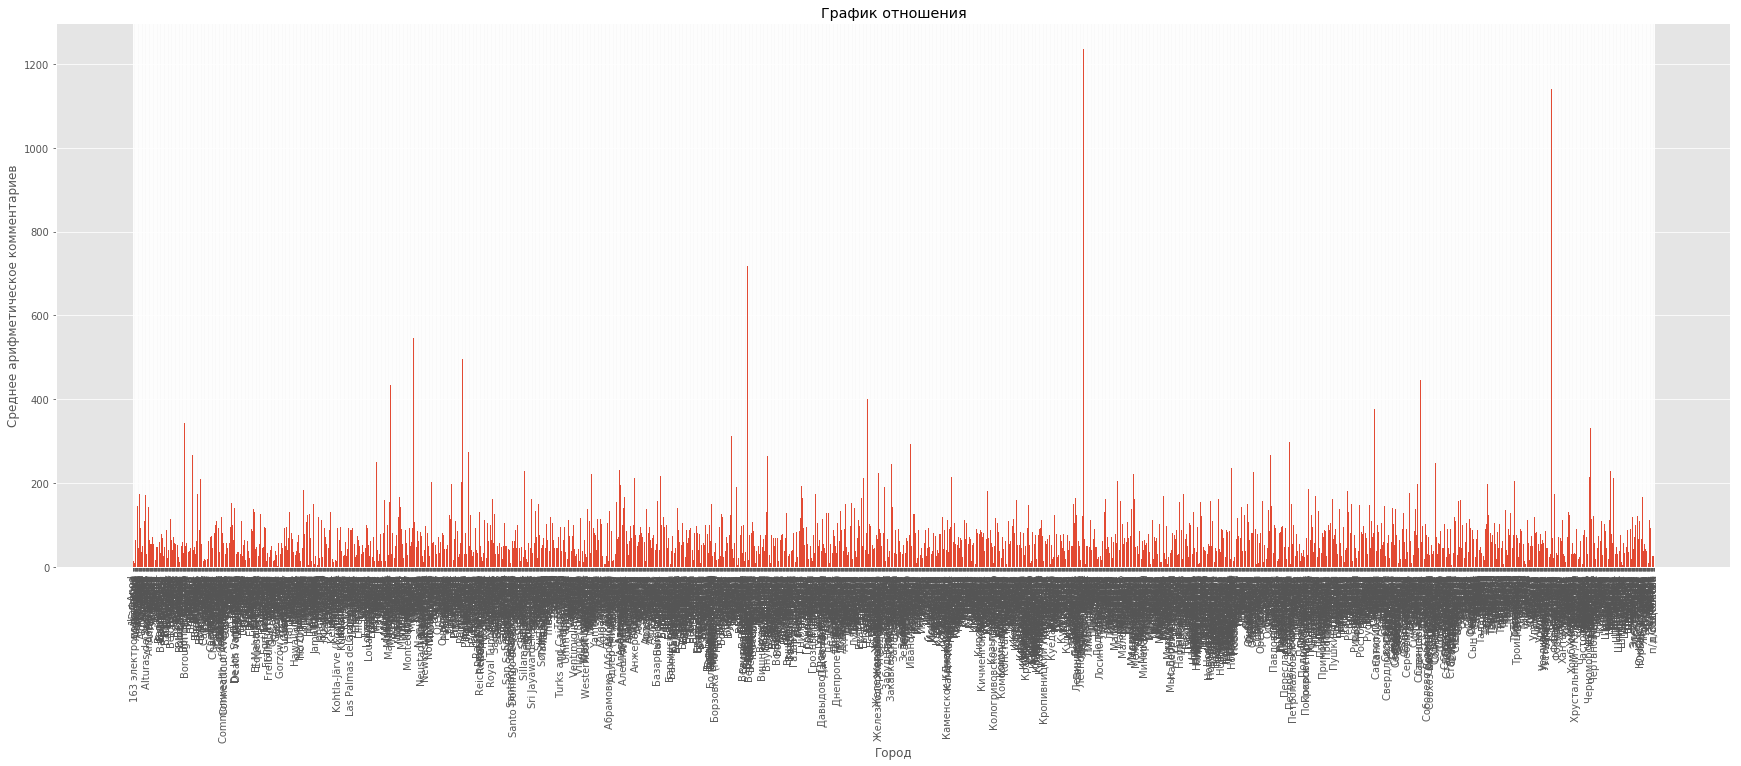

In [11]:
x = []
y = []
    
for k,v in d.items():
    x.append(k)
    y.append(v)

plt.figure(figsize=(30, 10))
plt.bar(x, y)
plt.title('График отношения')
plt.xlabel('Город')
plt.ylabel('Среднее арифметическое комментариев')
plt.xticks(rotation=90)
plt.savefig('plot__cities_to_avg_comments.png', format='png', dpi=100)

In [13]:
ages_to_avg_comments = {}

for k,v in comments_to_ages.items():
    if v not in ages_to_avg_comments:
        l = 0
        num = 0
        for key, value in comments_to_ages.items():
            if v == value:
                l += len(key)
                num += 1
            else:
                continue
        if v / 10 < 1:
            v = '00'+str(v)
        elif v / 10 < 10:
            v = '0'+str(v)
        ages_to_avg_comments[str(v)] = round(l/num)
    else:
        continue
        
print('done')

done


In [14]:
d = OrderedDict(sorted(ages_to_avg_comments.items(), key=lambda t: t[0]))
print(len(d))

102


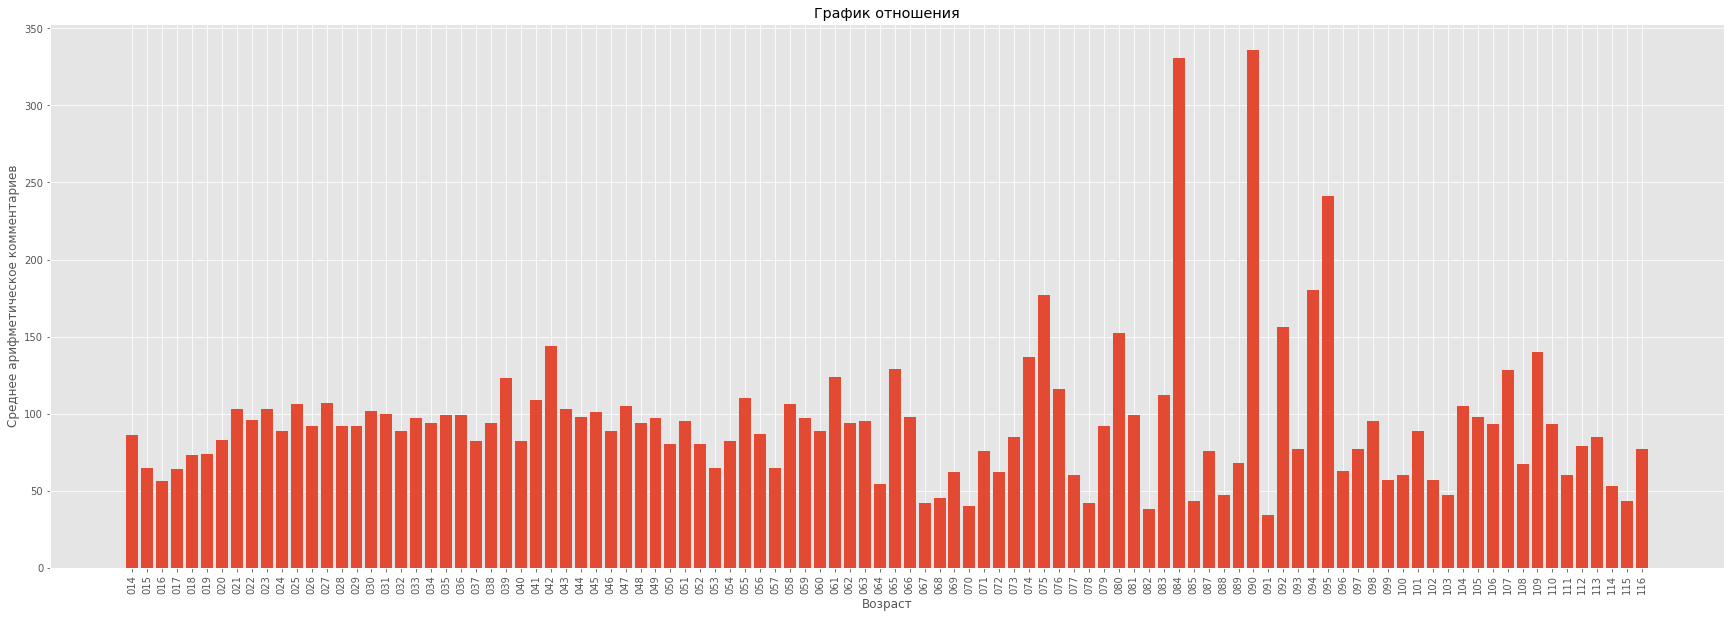

In [15]:
x = []
y = []
    
for k,v in d.items():
    x.append(k)
    y.append(v)

plt.figure(figsize=(30, 10))
plt.bar(x, y)
plt.title('График отношения')
plt.xlabel('Возраст')
plt.ylabel('Среднее арифметическое комментариев')
plt.xticks(rotation=90)
plt.savefig('plot__ages_to_avg_comments.png', format='png', dpi=100)